# Step 1: Introduction
# 🔍 Semantic Search using Sentence Embeddings

In this notebook, we'll learn how to:
- Embed sentences using a lightweight LLM (MiniLM)
- Compute cosine similarity between sentence vectors
- Retrieve the most semantically similar sentence from a collection

We'll use the `sentence-transformers` library which wraps powerful pretrained models for sentence encoding. The model used here is lightweight, fast, and ideal for Google Colab.



# Step 2: Install Required Libraries

In [1]:
# Step 2: Install Required Libraries
!pip install -q sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 753.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.1 MB/s eta 0:00:00


# Step 3: Import Libraries
## 📦 Import Required Python Libraries

We'll need:
- `SentenceTransformer` to generate sentence embeddings
- `cosine_similarity` to compute vector similarity
- `numpy` for basic numerical operations



In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Step 4: Define the Sentence Collection
## 📝 Define a Sentence Collection

This is the set of candidate sentences. Our goal is to find the sentence from this list that is semantically closest to a given input query.



In [3]:
sentences = [
    "AI is transforming the future of work.",
    "Machine learning is a subset of artificial intelligence.",
    "The stock market fluctuates based on economic data.",
    "Large language models can generate human-like text.",
    "Transformers use attention mechanisms to learn context.",
    "Vaccines have been instrumental in preventing diseases.",
    "Climate change poses a significant threat to biodiversity.",
    "Renewable energy sources are essential for sustainability."
]

# Step 5: Load Embedding Model
## ⚡ Load a Lightweight Embedding Model

We'll use the **MiniLM-L6-v2** model which balances performance and speed, suitable for limited compute environments like Google Colab.


In [4]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Step 6: Generate Embeddings for the Collection
## 📐 Encode the Sentence Collection

Now, we'll compute vector embeddings for each sentence in the list using our model.


In [5]:
sentence_embeddings = model.encode(sentences)

# Step 7: Input Query and Compute Similarity
## 💬 Input Query Sentence

We’ll take an input sentence, compute its embedding, and then measure cosine similarity with every sentence in our collection.


In [6]:
query = "What is the impact of artificial intelligence on jobs?"
query_embedding = model.encode([query])

# Compute cosine similarity with the sentence collection
cosine_scores = cosine_similarity(query_embedding, sentence_embeddings)

# Step 8: Retrieve the Most Similar Sentence
## ✅ Retrieve the Most Relevant Sentence

Based on the similarity scores, we’ll retrieve the sentence with the highest cosine similarity to the query.


In [7]:
top_index = np.argmax(cosine_scores)
print("Input Query:", query)
print("Most Similar Sentence:", sentences[top_index])
print("Similarity Score:", cosine_scores[0][top_index])

Input Query: What is the impact of artificial intelligence on jobs?
Most Similar Sentence: AI is transforming the future of work.
Similarity Score: 0.5926306


# Step 9: Visualize Results
## 📊 Visualize Similarity Scores

This table shows how close each sentence is to the query, giving you insights into semantic alignment.


In [8]:
import pandas as pd

df = pd.DataFrame({
    "Sentence": sentences,
    "Similarity Score": cosine_scores[0]
}).sort_values(by="Similarity Score", ascending=False)

df.reset_index(drop=True, inplace=True)
df

,Sentence,Similarity Score
0,AI is transforming the future of work.,0.592631
1,Machine learning is a subset of artificial int...,0.472060
2,The stock market fluctuates based on economic ...,0.206476
3,Transformers use attention mechanisms to learn...,0.185664
4,Large language models can generate human-like ...,0.152887
5,Climate change poses a significant threat to b...,0.128978
6,Vaccines have been instrumental in preventing ...,0.118405
7,Renewable energy sources are essential for sus...,0.033515


# 📊 Plot the Top 5 Similar Sentences
## 📈 Visualize Top 5 Semantic Matches

This plot shows the top 5 most semantically similar sentences to the query. The x-axis shows the first three words of each sentence, and the y-axis shows their cosine similarity scores.


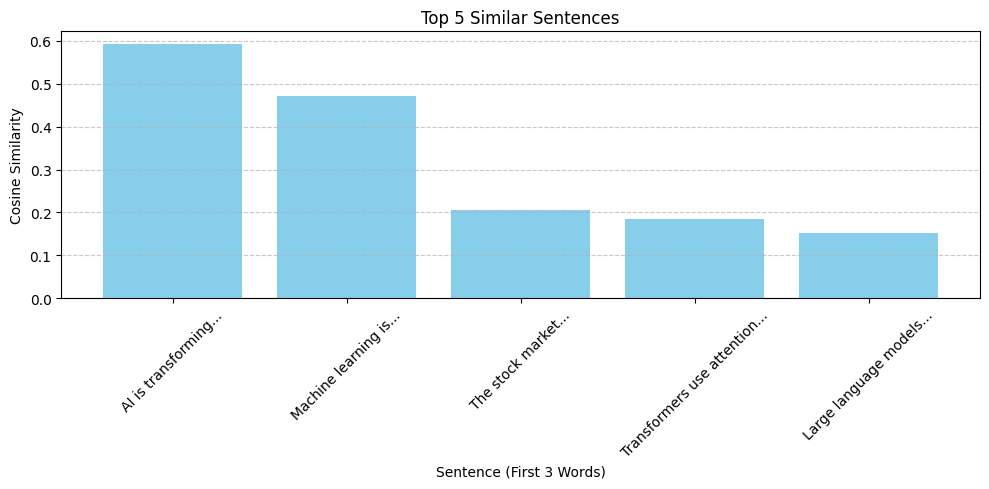

In [9]:
# Prepare top 5 results
top5 = df.head(5).copy()
top5["Short Label"] = top5["Sentence"].apply(lambda x: ' '.join(x.split()[:3]) + "...")

# Plot the bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(top5["Short Label"], top5["Similarity Score"], color='skyblue')
plt.title("Top 5 Similar Sentences")
plt.xlabel("Sentence (First 3 Words)")
plt.ylabel("Cosine Similarity")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()